In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("E:\\Prasad\\Deloitte\\Loan_Data")

In [3]:
data = pd.read_csv("loan.csv",low_memory = False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data= data.rename(columns = {"loan_amnt":"loan_amount","funded_amnt":"funded_amount","funded_amnt_inv":"investor_funds",
                      "int_rate":"intrest_rate","annual_inc":"annual_income"})

In [5]:
data.drop(["id",'member_id',"emp_title",'url',"desc",'zip_code','title'],axis = 1, inplace =True)

# distribution 

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected= True)

Text(0.5, 1.0, 'Total commited bby investors')

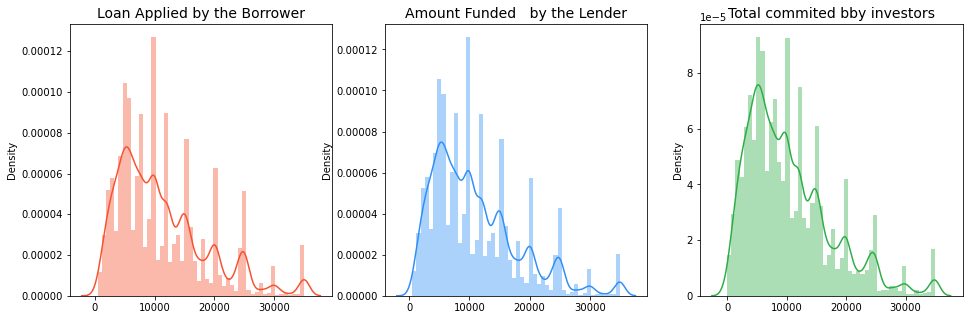

In [8]:
fig,ax  = plt.subplots(1,3,figsize=(16,5))

loan_amount = data["loan_amount"].values
funded_amount = data["funded_amount"].values
investor_funds = data["investor_funds"].values

sns.distplot(loan_amount, ax = ax[0],color = '#F7522F')#000000 to FFFFFF
ax[0].set_title("Loan Applied by the Borrower",fontsize = 14)

sns.distplot(funded_amount, ax = ax[1],color = '#2F8FF7')#000000 to FFFFFF
ax[1].set_title("Amount Funded   by the Lender",fontsize = 14)

sns.distplot(investor_funds, ax = ax[2],color = '#2EAD46')#000000 to FFFFFF
ax[2].set_title("Total commited bby investors",fontsize = 14)


In [1]:
list(data.columns)

NameError: name 'data' is not defined

# average loan amount issued in which year

In [10]:
data.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [11]:
import time
import datetime

In [12]:
data_series = pd.to_datetime(data.issue_d.str.upper(),format = '%b-%y',yearfirst = False)

In [13]:
data["year"]=data_series.dt.year

In [14]:
data.year.head(10)

0    2011
1    2011
2    2011
3    2011
4    2011
5    2011
6    2011
7    2011
8    2011
9    2011
Name: year, dtype: int64

Text(0, 0.5, 'Average loan amount issued')

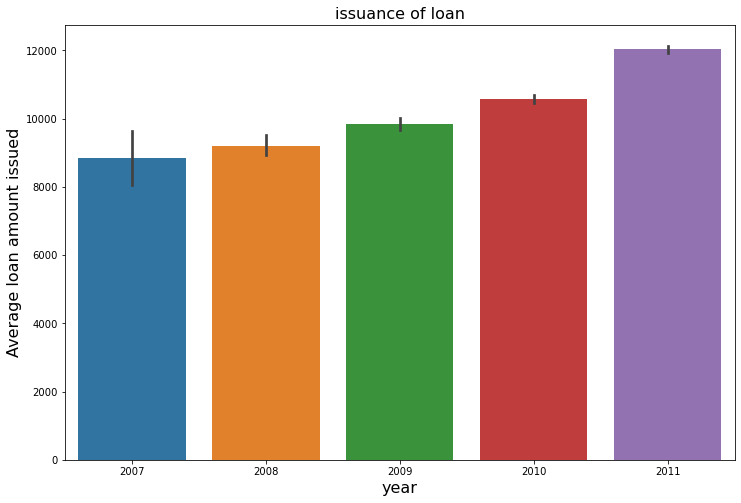

In [15]:
plt.figure(figsize = (12,8))
sns.barplot('year','loan_amount',data= data,palette = 'tab10')
plt.title('issuance of loan', fontsize = 16)
plt.xlabel('year',fontsize = 16)
plt.ylabel('Average loan amount issued', fontsize = 16)

In [16]:
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
bad_loan = ["Charged Off"]

data['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad_Loan'
    else:
        return 'Good_Loan'
data['loan_condition']= data['loan_status'].apply(loan_condition)

In [18]:
data["loan_condition"]

0        Good_Loan
1         Bad_Loan
2        Good_Loan
3        Good_Loan
4        Good_Loan
           ...    
39712    Good_Loan
39713    Good_Loan
39714    Good_Loan
39715    Good_Loan
39716    Good_Loan
Name: loan_condition, Length: 39717, dtype: object

[Text(0, 0.5, '(%)')]

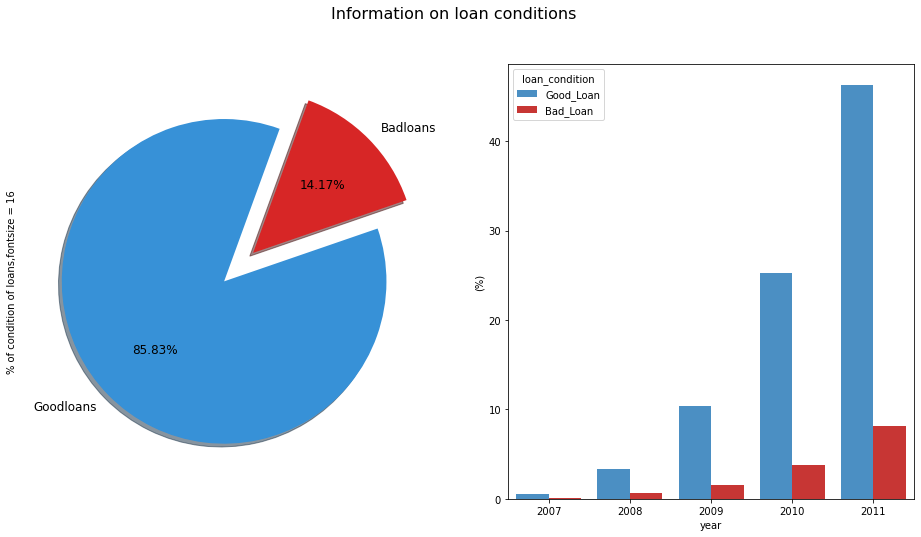

In [19]:
f , ax = plt.subplots(1,2,figsize = (16,8))
colors = ["#3791D7","#D72626"]
labels = 'Goodloans','Badloans'

plt.suptitle("Information on loan conditions",fontsize = 16)
data["loan_condition"].value_counts().plot.pie(explode = [0,0.25],autopct= '%1.2f%%',ax = ax[0],
                                               shadow =True,colors=colors,labels =labels,fontsize = 12,startangle =70)
ax[0].set_ylabel("% of condition of loans,fontsize = 16")

palette = ["#3791D7","#E01E1B"]
sns.barplot(x="year",y="loan_amount",hue = 'loan_condition',data=data,palette = palette,estimator =lambda x: len(x)/len(data)*100)
ax[1].set(ylabel = "(%)")

# loans issued by region

In [20]:
data.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [21]:
west = ["CA","OR","UT","WA","CO","NV","AK","MT","HI","WY","ID"]
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



data["region"]=np.nan

def finding_region(state):
    if state in west:
        return 'west'
    elif state in south_west:
        return 'south_west'
    elif state in south_east:
        return 'south_east'
    elif state in mid_west:
        return 'mid_west'
    elif state in north_east:
        return 'north_east'
data["region"]= data["addr_state"].apply(finding_region)

In [22]:
data.region

0        south_west
1        south_east
2          mid_west
3              west
4              west
            ...    
39712          west
39713    south_east
39714    north_east
39715    north_east
39716    north_east
Name: region, Length: 39717, dtype: object

In [23]:
data["complete_date"]= pd.to_datetime(data.issue_d.str.upper(),format = "%b-%y",yearfirst = False)
group_dates = data.groupby(["complete_date","region"],as_index = False).sum()

group_dates["issue_d"] = [month.to_period('M') for month in group_dates["complete_date"]]

group_dates =group_dates.groupby(['issue_d','region'],as_index = False).sum()
group_dates['loan_amount']=group_dates["loan_amount"]/1000

data_dates = pd.DataFrame(data = group_dates[["issue_d",'region','loan_amount']])

Text(0.5, 1.0, 'loan status by region')

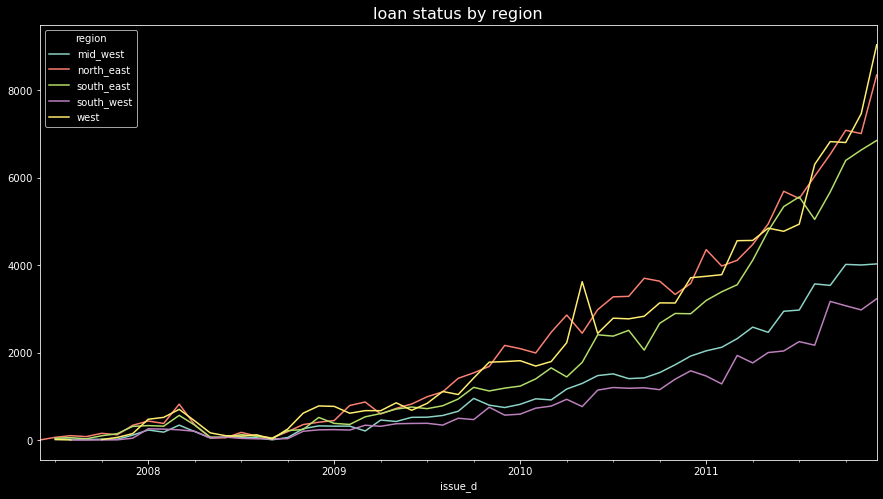

In [24]:
plt.style.use('dark_background')
cmap = plt.cm.Set3
issued_amount = data_dates.groupby(["issue_d",'region']).loan_amount.sum()
issued_amount.unstack().plot(stacked =False,colormap=cmap,grid =False,legend =True,figsize = (15,8))
plt.title("loan status by region", fontsize  = 16)

In [25]:
data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [27]:
employment_length = ['10+ years','< 1 year', '2 years','3 years','4 years',
                     '5 years','6 years','7 years','8 years','9 years','n/a']

lst = [data]
data["emp_length_int"] = np.nan

In [28]:
for col in lst:
    col.loc[col["emp_length"]=='10+ years',"emp_length_int"]=10
    col.loc[col["emp_length"]=='9 years',"emp_length_int"]=9
    col.loc[col["emp_length"]=='8 years',"emp_length_int"]=8
    col.loc[col["emp_length"]=='7 years',"emp_length_int"]=7
    col.loc[col["emp_length"]=='6 years',"emp_length_int"]=6
    col.loc[col["emp_length"]=='5 years',"emp_length_int"]=5
    col.loc[col["emp_length"]=='4 years',"emp_length_int"]=4
    col.loc[col["emp_length"]=='3 years',"emp_length_int"]=3
    col.loc[col["emp_length"]=='2 years',"emp_length_int"]=2
    col.loc[col["emp_length"]=='1 years',"emp_length_int"]=1
    col.loc[col["emp_length"]=='< 1 year',"emp_length_int"]=0.6
    col.loc[col["emp_length"]=='n/a',"emp_length_int"]=0

In [29]:
data["intrest_rate"]=pd.to_numeric(data["intrest_rate"].apply(lambda x:x.split('%')[0]))

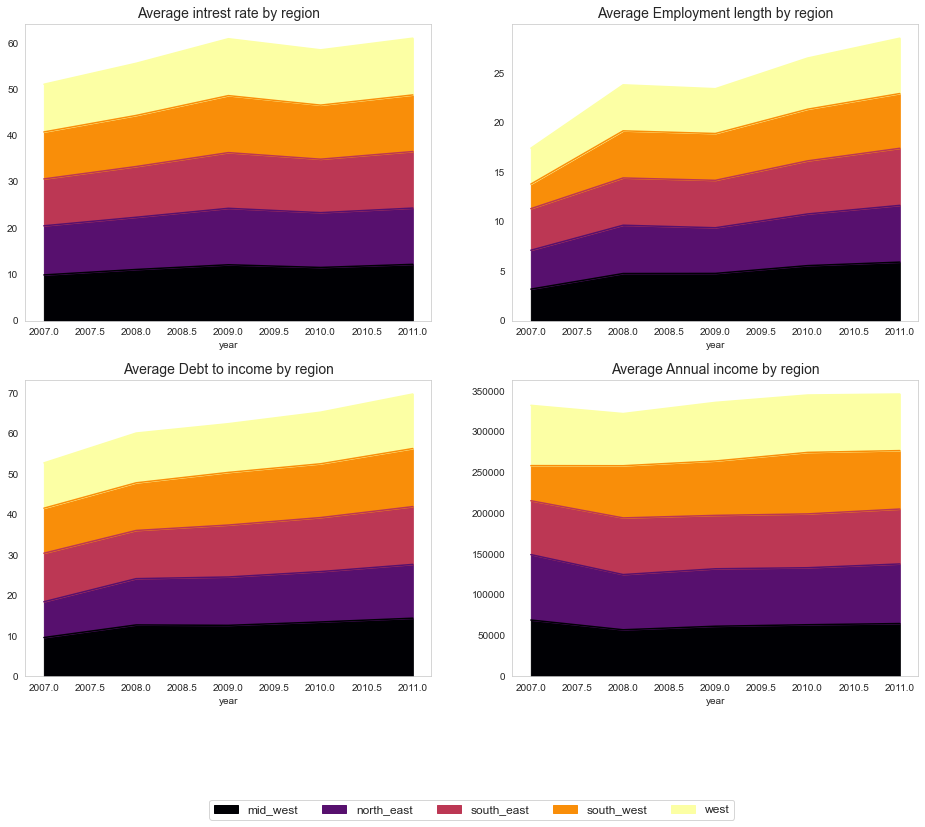

In [33]:
sns.set_style('whitegrid')

f, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
cmap = plt.cm.inferno

by_intrest_rate = data.groupby(['year','region']).intrest_rate.mean()
by_intrest_rate.unstack().plot(kind = "area",stacked = True,colormap =cmap,grid = False,legend = False,ax =ax1,figsize =(16,12))
ax1.set_title("Average intrest rate by region",fontsize=14)

by_employment_length = data.groupby(['year','region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind = "area",stacked = True,colormap =cmap,grid = False,legend = False,ax =ax2,figsize =(16,12))
ax2.set_title("Average Employment length by region",fontsize=14)

by_dti = data.groupby(['year','region']).dti.mean()
by_dti.unstack().plot(kind = "area",stacked = True,colormap =cmap,grid = False,legend = False,ax =ax3,figsize =(16,12))
ax3.set_title("Average Debt to income by region",fontsize=14)

by_income = data.groupby(['year','region']).annual_income.mean()
by_income.unstack().plot(kind = "area",stacked = True,colormap =cmap,grid = False,legend = False,ax =ax4,figsize =(16,12))
ax4.set_title("Average Annual income by region",fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0,-0.5,1.8,0.1),loc = 10,prop ={'size':12},ncol= 5,mode ="expnad",borderaxespad =0.)

In [39]:
badloans_data = data.loc[data["loan_condition"]=='Bad Loan']

loan_status_cross = pd.crosstab(badloans_data["region"],badloans_data["loan_status"]).apply(lambda x: x/x.sum()*100)

number_of_loanstatus = pd.crosstab(badloans_data["region"],badloans_data["loan_status"])



In [40]:
loan_status_cross["Charged Off"]= loan_status_cross["Charged Off"].apply(lambda x: round(x,2))

number_of_loanstatus["Total"] = number_of_loanstatus.sum(axis = 1)
number_of_loanstatus

KeyError: 'Charged Off'

In [42]:
data["income_category"]=np.nan

lst =[data]

for col in lst:
    col.loc[col["annual_income"]<=100000,'income_category']='Low'
    col.loc[(col["annual_income"]>100000) & (col["annual_income"]<=200000),'income_category']='Medium'
    col.loc[col["annual_income"]>200000,'income_category']='High'

tarnsform this loan_condition to integers

In [45]:
data.loan_condition.value_counts()

Good_Loan    34090
Bad_Loan      5627
Name: loan_condition, dtype: int64

In [46]:
lst = [data]
data["loan_condition_int"]=np.nan

for col in lst:
    col.loc[data["loan_condition"]=='Good_Loan','loan_condition_int']=0
    col.loc[data["loan_condition"]=='Bad_Loan','loan_condition_int']=1
    
data["loan_condition_int"]= data['loan_condition_int'].astype(int)

<AxesSubplot:xlabel='income_category', ylabel='intrest_rate'>

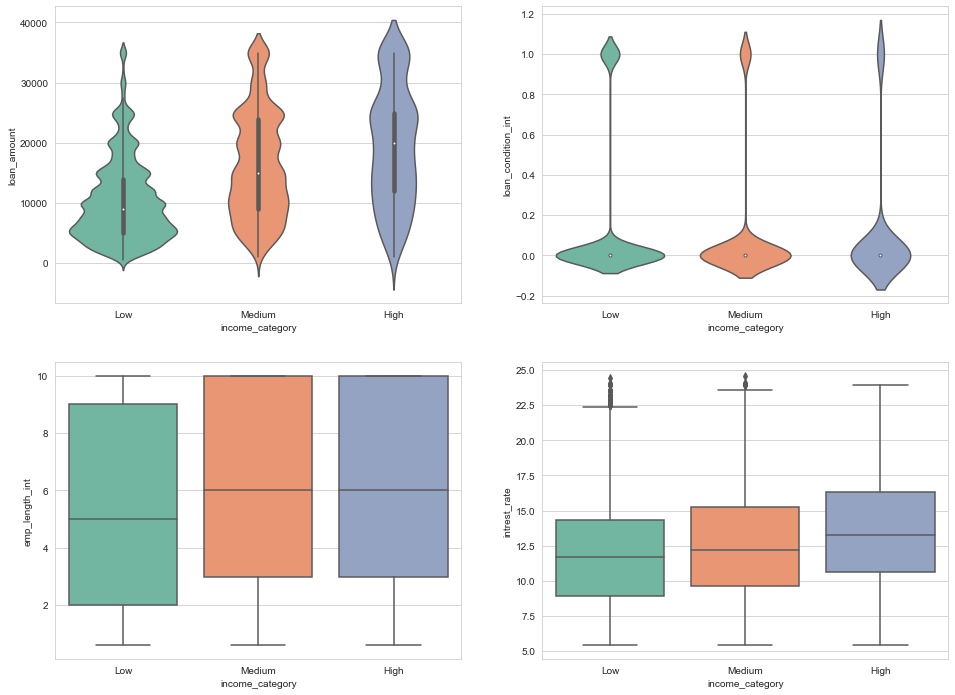

In [50]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize =(16,12))

sns.violinplot(x="income_category",y="loan_amount",data =data,palette= 'Set2',ax =ax1)
sns.violinplot(x="income_category",y="loan_condition_int",data =data,palette= 'Set2',ax =ax2)
sns.boxplot(x="income_category",y = 'emp_length_int',data=data,palette='Set2',ax=ax3)
sns.boxplot(x="income_category",y = 'intrest_rate',data=data,palette='Set2',ax=ax4)

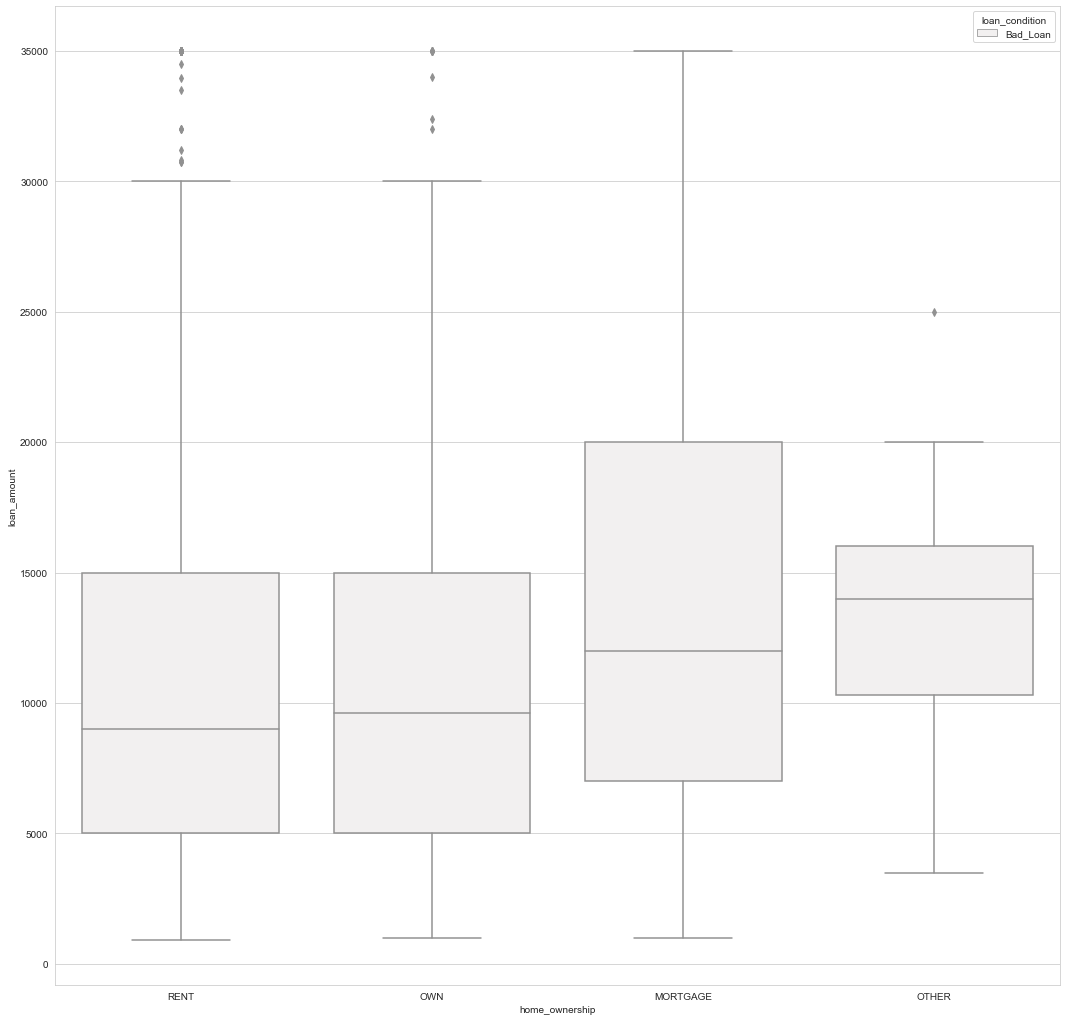

In [52]:
plt.figure(figsize=(18,18))

bad_data = data.loc[data['loan_condition']=='Bad_Loan']

#plt.subplot(211)

g= sns.boxplot(x="home_ownership",y = "loan_amount",hue ="loan_condition",data=bad_data,color='r')



In [ ]:
#yera vs loan_amount home ownership